# Article Level Cleaning

# LDA Implementation

1. Loading data
2. Data cleaning
3. Exploratory analysis
4. Preparing data for LDA analysis
5. LDA model training
6. Analyzing LDA model results
7. Model Evaluation

# NLP Pipeline: Building an NLP Pipeline, Step-by-Step
Text Preprocessing, Building a Text Normalizer, Understanding Text Structure, Text Processing, and Functionality

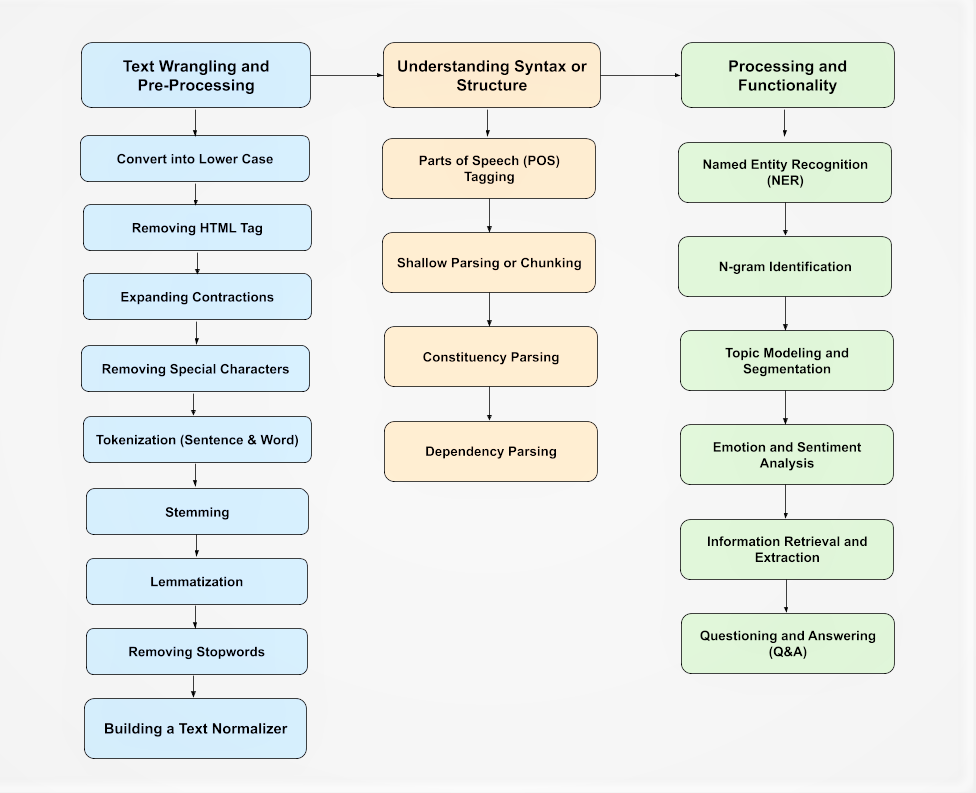

[Source](https://medium.com/@suneelpatel.in/nlp-pipeline-building-an-nlp-pipeline-step-by-step-7f0576e11d08)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('E:/NewsFMCG/NewsFMCG456.csv', encoding='latin1',
                 header=None, names=['Date', 'URL', 'Newspaper', 'Title', 'Article', 'Day', 'Month', 'ArticleLength'])
df.shape

(455, 8)

## Cleaning the Date columns separately for each of the data sets

In [ ]:
df1 = pd.read_csv(r'E:\NewsFMCG\EconomicTimesNew_Final.csv')
df2 = pd.read_csv(r'E:\NewsFMCG\LiveMintNew.csv')
df3 = pd.read_csv(r'E:\NewsFMCG\TheHinduBusinessLineNew(1).csv')
df4 = pd.read_csv(r'E:\NewsFMCG\TheHinduBusinessLineNew(2).csv')
df5 = pd.read_csv(r'E:\NewsFMCG\TheHinduBusinessLineNew(3).csv')
df6 = pd.read_csv(r'E:\NewsFMCG\TheHinduBusinessLineNew(4).csv')
df7 = pd.read_csv(r'E:\NewsFMCG\TheHinduBusinessLineNew(5).csv')

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
day = []
month = []
for elmnt in df2['Date']:
    elmnt = elmnt.split('-')
    day.append(elmnt[2])
    month.append(elmnt[1])
df2['Day'] = pd.Series(day)
df2['Month'] = pd.Series(month)

df2.head()

In [ ]:
df7['DateClean'] = df7['Date'].apply(lambda x: x.split('^')[0])

day = []
month = []
for elmnt in df7['DateClean']:
    elmnt = elmnt.split()
    day.append(elmnt[1])
    month.append(elmnt[0])
df7['Day'] = pd.Series(day)
df7['Month'] = pd.Series(month)

df7.head()

In [ ]:
df7['Month'].unique()

In [ ]:
df7['Month'].replace(to_replace=['January', 'February', 'March'],
                   value=['01', '02', '03'],
                   inplace=True)
df7['Day'].replace(to_replace=['1','2','3','4','5','6','7','8','9'],
                 value=['01','02','03','04','05','06','07','08','09'],
                 inplace=True)

df7['Date'] = '2020-' + df7['Month'] + '-' + df7['Day']

df7.drop('DateClean', axis=1, inplace=True)

df7.head()

In [ ]:
df7.tail()

In [ ]:
df2.columns

In [ ]:
df2.columns = ['Date', 'URL', 'Newspaper', 'Title', 'Article', 'Day', 'Month']

In [ ]:
#df3.drop(['DateClean'], axis=1, inplace=True)
df2['ArticleLength'] = df2['Article'].apply(lambda x: len(x))
df2.head()

In [ ]:
df5.head()

In [ ]:
df1.head()

In [ ]:
df0 = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0, ignore_index=True)
df0.shape

In [ ]:
df0.head()

In [ ]:
df0['ArticleLength'].hist(bins=30);

In [ ]:
df_final = pd.concat([df,df0],axis=0,ignore_index=True)
df_final.shape

In [ ]:
title = df_final['Title']
dup = title[title.duplicated(keep='last')]
dup.index

In [ ]:
df_final.shape

In [ ]:
df_final.drop(dup.index, axis=0, inplace=True)
df_final.shape

In [ ]:
df_final.to_csv(r'E:\NewsFMCG\NewsFMCG(withoutDups)(456,8).csv', index=False)

In [ ]:
df.shape

In [ ]:
df0.shape

In [ ]:
df8 = pd.read_csv(r'E:\NewsFMCG\Cleaning1.csv') 
df8.shape

In [ ]:
df_final.head()

In [ ]:
df.drop(0,axis=0,inplace=True)
#df.reset_index(drop=True)

In [ ]:
df.reset_index(drop=True,inplace=True);

In [4]:
df.drop([0,1,2,3,4,5], axis=0, inplace=True)
df.shape

(449, 8)

In [5]:
df.reset_index(drop=True,inplace=True)
df.tail()

,Date,URL,Newspaper,Title,Article,Day,Month,ArticleLength
444,29-09-2020,https://economictimes.indiatimes.com/news/comp...,EconomicTimes,India is my Ferrari... so you have to win: Mon...,"Mondelez International, the maker of Cadbury D...",29,9,2557
445,30-09-2020,https://economictimes.indiatimes.com/news/comp...,EconomicTimes,CXOs share pandemic's lessons to help others t...,"NEW DELHI: Britannia, one of the top two biscu...",30,9,445
446,01-10-2020,https://www.thehindubusinessline.com/money-and...,The Hindu BusinessLine,SBI in tie-up to offer digital payment solutio...,State Bank of India (SBI) and Hindustan Unilev...,1,10,2873
447,04-10-2020,https://www.livemint.com/news/business-of-life...,LiveMint,Pandemic gives restaurants a taste for tech,Wat-a-Burger a homegrown burger chain with 55...,4,10,6880
448,05-10-2020,https://www.thehindubusinessline.com/companies...,The Hindu BusinessLine,Marico sees partial revival of sentiments in F...,The second quarter of this financial year saw ...,5,10,2944


## Remove Punctuation/Lower Casing

In [8]:
# Load the regular expression library
import re
import string

stopwords = nltk.corpus.stopwords.words('english')
#ps = nltk.PorterStemmer()

# Text Cleaning

In [9]:
df['Article'].head()

0    FMCG companies are either ramping up productio...
1    Third-party logistics services provider Mahind...
2    (This story originally appeared in on Mar 08  ...
3    New Delhi: COVID-19 grips the job market with ...
4    Even as India Inc implements work-from-home to...
Name: Article, dtype: object

In [10]:
# Remove punctuation
df['Article_nopunc'] = df['Article'].map(lambda x: ''.join([ch for ch in x if ch not in string.punctuation]))
# Convert the articles to lowercase
df['Article_nopunc'] = df['Article_nopunc'].map(lambda x: x.lower())
# Print out the first rows of papers
df['Article_nopunc'].head()

0    fmcg companies are either ramping up productio...
1    thirdparty logistics services provider mahindr...
2    this story originally appeared in on mar 08  2...
3    new delhi covid19 grips the job market with mo...
4    even as india inc implements workfromhome to c...
Name: Article_nopunc, dtype: object

In [12]:
remove = ['is','the','back','even','month','due','according','will','say','well','said', 'also',
          'see','many','us','around','mar','apr','may','jun','jul','aug','sept','sep','march',
          'april','may','june','july','august','september','take','day','make','given',
          'come','number','level','one','including','seen','says','saying']
stopwords = stopwords + remove

def clean_text(txt_lower):
    #txt = ''.join([c for c in txt if c not in string.punctuation])
    #txt = [ps.stem(word) for word in tokens if word not in stopwords]
    tokens = re.split('\W+', txt_lower)
    #tokens = re.split(' ', txt_lower)
    txt_lower = ' '.join([word for word in tokens if word not in stopwords])
    txt_lower = ''.join([i for i in txt_lower if not i.isdigit()])
    return(txt_lower)

In [13]:
df['Article_Cleaned'] = df['Article_nopunc'].map(lambda x: clean_text(x))

In [14]:
df['Article_Cleaned'].iloc[0]

'fmcg companies either ramping production doubling distribution efforts ensure availability hygiene products handwash hand sanitisers retail shelves meet massive spike demand india begins reporting increase coronavirus casesconsumers certain regions took social media report shortage products hand sanitisers key fmcg players wednesday stated adequate stocks available productscreating awarenesssunil kataria ceo india saarc godrej consumer products ltd ramped production protekt hand wash sanitisers units vendor partner units started strong digital campaign godrej protekt create awareness regime washing hands regularly helps preventing spread viruses intent campaign educate consumers prevention spread covida company spokesperson hindustan unilever company adequate stocks hand sanitisers meet spike demand surge demand hygiene products redoubled efforts ensure consumers access products keep safe lifebuoy hand sanitisers hand wash certain pockets witness shortage sudden demand overall adequat

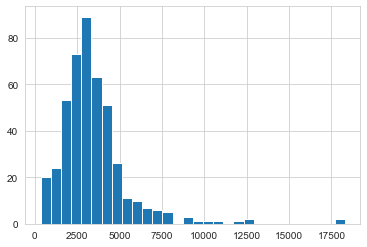

In [15]:
df['ArticleLength'].hist(bins=30);

In [22]:
df.columns

Index(['Date', 'URL', 'Newspaper', 'Title', 'Article', 'Day', 'Month',
       'ArticleLength', 'Article_nopunc', 'Article_Cleaned', 'Article_Use'],
      dtype='object')

## Exploratory Data Analysis
To verify whether the pre-processing happened correctly

We’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

In [23]:
long_string = ','.join(list(df['Article_Use'].values))
len(long_string)

998558

In [24]:
# Import the wordcloud library
# conda install -c conda-forge wordcloud

from wordcloud import WordCloud

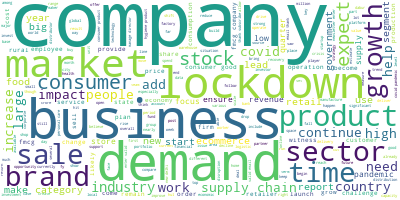

In [110]:
# Join the different processed articles together.
#long_string = ','.join(list(df['Article_clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Lemmatization


In [17]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
    
def lmma(text):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lm_text=' '.join([lemmatizer.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens)])
    #lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
    return(lm_text)

In [18]:
Article_list = list(df['Article_Cleaned'].values)
len(Article_list)

449

In [19]:
Article_list = list(df['Article_Cleaned'].values)
article_list = []
for article in Article_list:
    article_list.append(lmma(article))
len(article_list)

449

In [21]:
df['Article_Use'] = pd.Series(article_list)
df.head()

,Date,URL,Newspaper,Title,Article,Day,Month,ArticleLength,Article_nopunc,Article_Cleaned,Article_Use
0,05-03-2020,https://www.thehindubusinessline.com/economy/f...,The Hindu BusinessLine,FMCG companies ramp up manufacturing and distr...,FMCG companies are either ramping up productio...,5,3,3680,fmcg companies are either ramping up productio...,fmcg companies either ramping production doubl...,fmcg company either ramp production double dis...
1,05-03-2020,https://www.thehindubusinessline.com/companies...,The Hindu BusinessLine,Mahindra Logistics sees FY21 growth stemming f...,Third-party logistics services provider Mahind...,5,3,1782,thirdparty logistics services provider mahindr...,thirdparty logistics services provider mahindr...,thirdparty logistics service provider mahindra...
2,08-03-2020,https://economictimes.indiatimes.com/news/comp...,Economic Times,Women in India Inc: 19% in 2016 26% now,(This story originally appeared in on Mar 08 ...,8,3,1736,this story originally appeared in on mar 08 2...,story originally appeared mumbai india inc ap...,story originally appear mumbai india inc appea...
3,12-03-2020,https://economictimes.indiatimes.com/jobs/covi...,Economic Times,COVID-19 Impact: Talent demand dips,New Delhi: COVID-19 grips the job market with ...,12,3,1368,new delhi covid19 grips the job market with mo...,new delhi covid grips job market sectors regis...,new delhi covid grip job market sector registe...
4,18-03-2020,https://www.thehindubusinessline.com/economy/w...,The Hindu BusinessLine,Work-from-home a tough proposition for manufac...,Even as India Inc implements work-from-home to...,18,3,4756,even as india inc implements workfromhome to c...,india inc implements workfromhome counter thre...,india inc implement workfromhome counter threa...


# Checking for Concordance of unclear words in the wordcloud

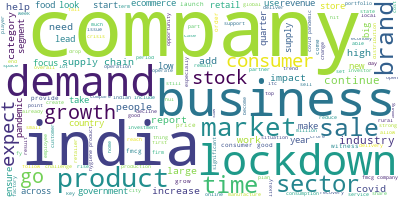

In [26]:
import nltk.corpus
from nltk.text import Text

In [32]:
long_string = ','.join(list(df['Article_Use'].values))
len(long_string)

998558

In [38]:
news = Text(word_tokenize(long_string))

In [39]:
type(news)

nltk.text.Text

In [ ]:
'go','across','itc','india','point','look','take','indian','thing'

In [100]:
news.concordance('day')

Displaying 25 of 194 matches:
etail industry body seek grace period day pay statutory due moratorium payment 
umption india rai saidfirstly request day grace period deposit statutory due in
ayment bank shoud announce moratorium day payment instalment interest term loan
 npa report guideline account default day report npa till december reserve bank
ri coo bb platform tradeindiacom last day demand sanitisers increase face mask 
consumer category explain last couple day panic buying across city category agr
s although face disruption last three day take corrective action gear supply me
meet increased demand face constraint day take time build capacity term storage
inhouse consumption spike staple come day already see consumer stock staple key
d addedas people start work home past day business restaurant institutional cat
 observe increase grocery staple last day immunity boost item honey ayurvedic p
 delivery person financial assistance day actively drive deliver uber get diagn
e dpiit mi

In [53]:
len(article_list)

449

In [54]:
count_point = []
for art in article_list:
    count_point.append(art.count(' point '))

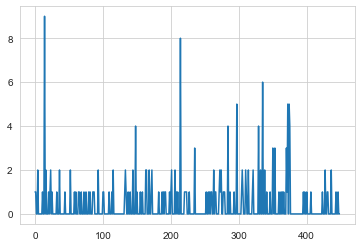

In [55]:
plt.plot(count_point);

In [76]:
lt_clean = []
for i in range(len(count_point)):
    if count_point[i] >= 7:
        lt_clean.append(i)
        
list(lt_clean)

[14, 214]

In [102]:
remove = ['go','across','itc','india','point','look','take','indian','thing']

def clean_text_remove(txt):
    tokens = word_tokenize(txt)
    txt = ' '.join([word for word in tokens if word not in remove])
    return(txt)

df['Article_Use_F'] = df['Article_Use'].apply(lambda x: clean_text_remove(x))

sum(df['Article_Use_F'] == df['Article_Use'])

16

In [107]:
long_string = ','.join(list(df['Article_Use_F'].values))
len(long_string)

982230

In [108]:
# Each word is used 18,221 times on an average
len(long_string) / len(set(long_string)) 

29764.545454545456

In [115]:
#df.drop(['Article_nopunc','Article_Cleaned','Article_Use','ArticleLength'],axis=1,inplace=True)
df.head()

,Date,URL,Newspaper,Title,Article,Day,Month,ArticleFinal
0,05-03-2020,https://www.thehindubusinessline.com/economy/f...,The Hindu BusinessLine,FMCG companies ramp up manufacturing and distr...,FMCG companies are either ramping up productio...,5,3,fmcg company either ramp production double dis...
1,05-03-2020,https://www.thehindubusinessline.com/companies...,The Hindu BusinessLine,Mahindra Logistics sees FY21 growth stemming f...,Third-party logistics services provider Mahind...,5,3,thirdparty logistics service provider mahindra...
2,08-03-2020,https://economictimes.indiatimes.com/news/comp...,Economic Times,Women in India Inc: 19% in 2016 26% now,(This story originally appeared in on Mar 08 ...,8,3,story originally appear mumbai inc appear move...
3,12-03-2020,https://economictimes.indiatimes.com/jobs/covi...,Economic Times,COVID-19 Impact: Talent demand dips,New Delhi: COVID-19 grips the job market with ...,12,3,new delhi covid grip job market sector registe...
4,18-03-2020,https://www.thehindubusinessline.com/economy/w...,The Hindu BusinessLine,Work-from-home a tough proposition for manufac...,Even as India Inc implements work-from-home to...,18,3,inc implement workfromhome counter threat covi...


In [114]:
df.columns = ['Date', 'URL', 'Newspaper', 'Title', 'Article', 'Day', 'Month',
       'ArticleFinal']

In [116]:
df.shape

(449, 8)

In [117]:
df.to_csv(r'E:\NewsFMCG\NewsFMCGFinal.csv',index=False)